In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_curve, recall_score, auc, roc_auc_score

!ls ../results

googlenet_weights.npy
logs
metrics
models
OEDCWPAL_PETA_features_all.pickle
PETA_coarse_to_fine_labels_pd.csv
PETA.csv
PETA_labels_pd.csv
PETA_lowerBody_labels_pd.csv
PETA_ratio_positive_samples_for_attributes.json
predictions
relation_array.npy
samples


In [2]:
labels_list_file = r"/home/anhaoran/data/pedestrian_attributes_PETA/PETA/labels.txt" 
labels_list_data = open(labels_list_file)
lines = labels_list_data.readlines()
attributes_list = []
for line in lines:
    data = line.split()
    #print(attr)
    attributes_list.append(data[1])
print("The total attributes labeled: ", len(attributes_list))
print(attributes_list)

The total attributes labeled:  65
['accessoryHeadphone', 'personalLess15', 'personalLess30', 'personalLess45', 'personalLess60', 'personalLarger60', 'carryingBabyBuggy', 'carryingBackpack', 'hairBald', 'footwearBoots', 'lowerBodyCapri', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'lowerBodyCasual', 'upperBodyCasual', 'personalFemale', 'carryingFolder', 'lowerBodyFormal', 'upperBodyFormal', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'upperBodyLogo', 'hairLong', 'lowerBodyLongSkirt', 'upperBodyLongSleeve', 'lowerBodyPlaid', 'lowerBodyThinStripes', 'carryingLuggageCase', 'personalMale', 'carryingMessengerBag', 'accessoryMuffler', 'accessoryNothing', 'carryingNothing', 'upperBodyNoSleeve', 'upperBodyPlaid', 'carryingPlasticBags', 'footwearSandals', 'footwearShoes', 'hairShort', 'lowerBodyShorts', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStockin

In [3]:
low_level = [27, 32, 50, 56]#, 61, 62, 63, 64
mid_level = [0, 6, 7, 8, 9, 11, 12, 13, 17, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 33, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60]
high_level = [1, 2, 3, 4, 5, 10, 14, 15, 16, 18, 19, 31, 34, 40]
attributes_list_hiar = list(np.array(attributes_list)[list(np.hstack((low_level, mid_level, high_level)))])
print("The total attributes labeled: ", len(attributes_list_hiar))
print(attributes_list_hiar)
data_dict = {"attributes": attributes_list_hiar}

The total attributes labeled:  61
['upperBodyLogo', 'lowerBodyThinStripes', 'upperBodyThinStripes', 'upperBodyThickStripes', 'accessoryHeadphone', 'carryingBabyBuggy', 'carryingBackpack', 'hairBald', 'footwearBoots', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'carryingFolder', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'hairLong', 'lowerBodyLongSkirt', 'upperBodyLongSleeve', 'carryingLuggageCase', 'carryingMessengerBag', 'accessoryMuffler', 'accessoryNothing', 'carryingNothing', 'upperBodyNoSleeve', 'carryingPlasticBags', 'footwearSandals', 'footwearShoes', 'hairShort', 'lowerBodyShorts', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStocking', 'upperBodySuit', 'carryingSuitcase', 'lowerBodySuits', 'accessorySunglasses', 'upperBodySweater', 'lowerBodyTrousers', 'upperBodyTshirt', 'upperBodyOther', 'upperBodyVNeck', 'personalLess15', 'personalLe

In [4]:
filename = r"../results/PETA.csv"
data = np.array(pd.read_csv(filename))[:, 1:]
length = len(data)
data_y = np.zeros((length, 61))
for i in range(length):
    #img = image.load_img(path + m)
    #img = image.load_img(data[i, 0], target_size=(160, 75, 3))
    #data_x[i] = image.img_to_array(img)
    data_y[i] = np.array(data[i, 1:1+61], dtype="float32")
data_y_hiar = data_y[:, list(np.hstack((low_level, mid_level, high_level)))]
y_test = data_y[11400:]
y_test_hiar = data_y_hiar[11400:]
print("The shape of the y_test is: ", y_test.shape)
print("The shape of the y_test is: ", y_test_hiar.shape)

The shape of the y_test is:  (7600, 61)
The shape of the y_test is:  (7600, 61)


In [5]:
#selected = [0,1,2,3,6,9,14,16,17,19,20,21,24,25,26,27,29,30,31,33,34,35,36,41,43,44,45,46,48,49,50,51,53,54,55,56,57,58,59,60]
#selected_ = [27,32,50,56,7,11,21,23,24,26,28,29,35,36,37,38,41,42,43,45,46,47,48,54,57,58,59,60,2,3,4,5,14,15,18,19,31,34,40]
selected = [0,2,3,6,9,14,16,17,19,20,21,24,25,26,27,29,30,31,33,34,35,36,41,43,44,45,46,48,49,50,51,53,54,55,56,57,58,59,60]
selected_ = [27,50,56,7,11,21,23,24,26,28,29,35,36,37,38,41,42,43,45,46,47,48,54,57,58,59,60,2,3,4,5,14,15,18,19,31,34,40]
for i in selected_:
    print(str(i),attributes_list[i], end=",")
print()
for i in selected:
    print(str(i), attributes_list_hiar[i], end=",")
print()

27 upperBodyLogo,50 upperBodyThinStripes,56 upperBodyThickStripes,7 carryingBackpack,11 carryingOther,21 accessoryHat,23 upperBodyJacket,24 lowerBodyJeans,26 footwearLeatherShoes,28 hairLong,29 lowerBodyLongSkirt,35 carryingMessengerBag,36 accessoryMuffler,37 accessoryNothing,38 carryingNothing,41 carryingPlasticBags,42 footwearSandals,43 footwearShoes,45 lowerBodyShorts,46 upperBodyShortSleeve,47 lowerBodyShortSkirt,48 footwearSneakers,54 accessorySunglasses,57 lowerBodyTrousers,58 upperBodyTshirt,59 upperBodyOther,60 upperBodyVNeck,2 personalLess30,3 personalLess45,4 personalLess60,5 personalLarger60,14 lowerBodyCasual,15 upperBodyCasual,18 lowerBodyFormal,19 upperBodyFormal,31 lowerBodyPlaid,34 personalMale,40 upperBodyPlaid,
0 upperBodyLogo,2 upperBodyThinStripes,3 upperBodyThickStripes,6 carryingBackpack,9 carryingOther,14 accessoryHat,16 upperBodyJacket,17 lowerBodyJeans,19 footwearLeatherShoes,20 hairLong,21 lowerBodyLongSkirt,24 carryingMessengerBag,25 accessoryMuffler,26 acces

# corr()

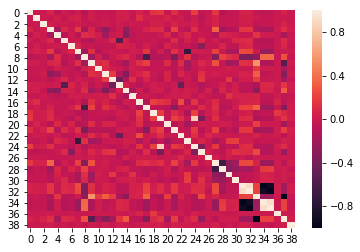

carryingBackpack , personalLess30 ---> ( 6 , 48 )
footwearLeatherShoes , lowerBodyFormal ---> ( 19 , 56 )
footwearLeatherShoes , upperBodyFormal ---> ( 19 , 57 )
hairLong , personalFemale ---> ( 20 , 55 )
carryingMessengerBag , personalFemale ---> ( 24 , 55 )
carryingNothing , personalMale ---> ( 27 , 59 )
footwearShoes , personalFemale ---> ( 31 , 55 )
upperBodyShortSleeve , upperBodyTshirt ---> ( 34 , 44 )
lowerBodyCasual , upperBodyCasual ---> ( 53 , 54 )
lowerBodyFormal , upperBodyFormal ---> ( 56 , 57 )


In [26]:
label = y_test_hiar[:, selected]
#label[:, 3] = 1 - label[:, 3]
label = pd.DataFrame(label)#selected
attributes_corr = label.corr()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(attributes_corr)
plt.show()
attributes_corr_arr = np.array(attributes_corr)
for i in range(attributes_corr_arr.shape[0]):
    for j in range(i+1, attributes_corr_arr.shape[1]):
        if attributes_corr_arr[i][j] >= 0.3:
            print(attributes_list_hiar[selected[i]], ',', attributes_list_hiar[selected[j]], "--->", '(',selected[i],',',selected[j],')')

In [30]:
###personalFemal
sli_ = []#28, 29, 47, 34
sli = [20, 24, 27, 31, 55]#20, 21, 35, 59
for i in sli:
    sli_.append(attributes_list.index(attributes_list_hiar[i]))
#lowerBodyCasual
#sli_ = [24, 29, 42, 45, 47, 14]
#sli = [17, 21, 30, 33, 35, 53]
#upperBodyCasual
#sli_ = [27, 56, 21, 23, 46, 58, 15]
#sli = [0, 3, 14, 16, 34, 44, 54]
#lowerBodyFormal
#sli_ = [50, 26, 57, 60, 18]
#sli = [2, 19, 43, 46, 56]
#upperBodyPlaid
#sli_ = [50, 56, 40]
#sli = [2, 3, 60]

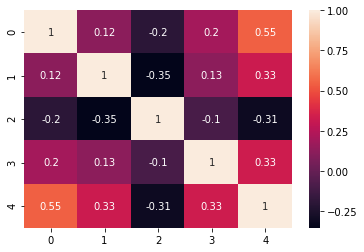

In [31]:
label = y_test_hiar[:, sli]
#label[:, 3] = 1 - label[:, 3]
label = pd.DataFrame(label)#selected
attributes_corr = label.corr()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(attributes_corr, annot=True)
plt.show()

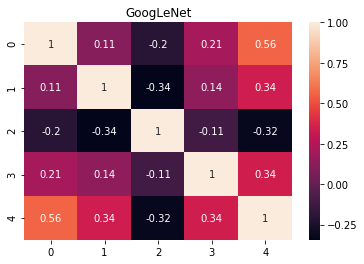

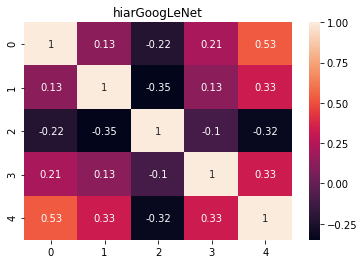

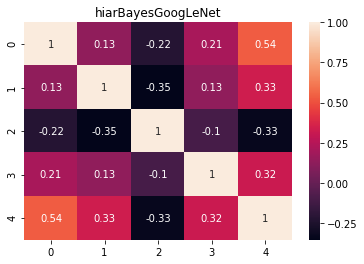

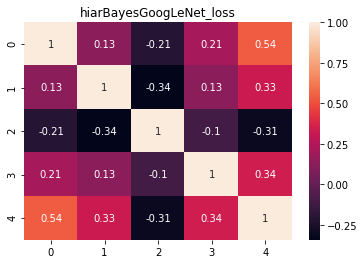

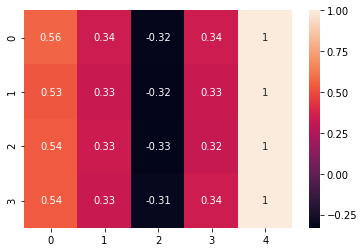

In [32]:
###GoogLeNet
predictions_prob = np.load("../results/predictions/GoogLeNet_binary61_predictions_imagenet_test7600.npy")
predictions = np.array(predictions_prob , dtype="float64")[:, sli_]#selected_#>= 0.5
#predictions[:, 3] = 1 - predictions[:, 3]
predictions = pd.DataFrame(predictions)
attributes_corr_1 = predictions.corr()
sns.heatmap(attributes_corr_1, annot=True)
plt.title("GoogLeNet")
plt.show()

###hiarGoogLeNet
predictions_prob = np.load("../results/predictions/hiarGoogLeNet_binary61_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob , dtype="float64")[:, sli]#selected#>= 0.5
#predictions[:, 3] = 1 - predictions[:, 3]
predictions = pd.DataFrame(predictions)
attributes_corr_2 = predictions.corr()
sns.heatmap(attributes_corr_2, annot=True)
plt.title("hiarGoogLeNet")
plt.show()

###hiarBayesGoogLeNet
predictions_prob = np.load("../results/predictions/hiarBayesGoogLeNet_binary61_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob, dtype="float64")[:, sli]#selected# >= 0.5
#predictions[:, 3] = 1 - predictions[:, 3]
predictions = pd.DataFrame(predictions)
attributes_corr_3 = predictions.corr()
sns.heatmap(attributes_corr_3, annot=True)
plt.title("hiarBayesGoogLeNet")
plt.show()

###hiarBayesGoogLeNet_loss
predictions_prob = np.load("../results/predictions/hiarBayesGoogLeNet_binary61_multi_loss_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob, dtype="float64")[:, sli]#selected# >= 0.5
#predictions[:, 3] = 1 - predictions[:, 3]
predictions = pd.DataFrame(predictions)
attributes_corr_4 = predictions.corr()
sns.heatmap(attributes_corr_4, annot=True)
plt.title("hiarBayesGoogLeNet_loss")
plt.show()

sns.heatmap(np.vstack((np.array(attributes_corr_1)[-1], np.array(attributes_corr_2)[-1], np.array(attributes_corr_3)[-1], np.array(attributes_corr_4)[-1])), annot=True)
plt.show()

# Bayes_scatter

In [78]:
###personalFemal
sli_ = [ 47, 34]#28, 29,
sli = [ 35, 59]#20, 21,
#for i in sli:
#    sli_.append(attributes_list.index(attributes_list_hiar[i]))
#lowerBodyCasual
#sli_ = [24, 29, 42, 45, 47, 14]
#sli = [17, 21, 30, 33, 35, 53]
#upperBodyCasual
#sli_ = [27, 56, 21, 23, 46, 58, 15]
#sli = [0, 3, 14, 16, 34, 44, 54]
#lowerBodyFormal
#sli_ = [50, 26, 57, 60, 18]
#sli = [2, 19, 43, 46, 56]
#upperBodyPlaid
#sli_ = [50, 56, 40]
#sli = [2, 3, 60]

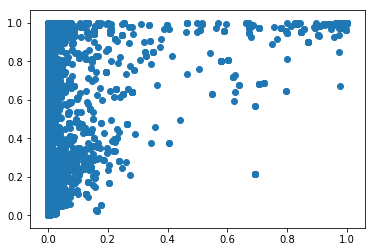

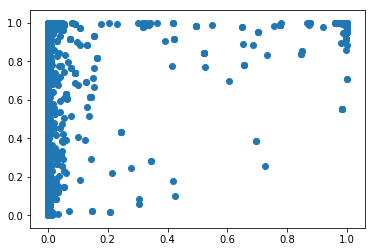

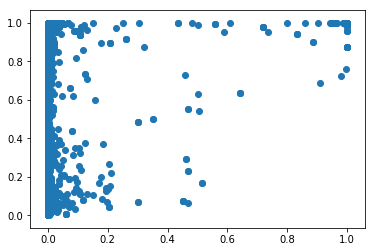

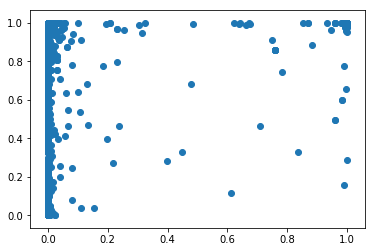

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

markers = ['x', 'o', '+', '.', 'v', '<', '>', '*']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
gender = True
###GoogLeNet
predictions_prob = np.load("../results/predictions/GoogLeNet_binary61_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob , dtype="float64")[:, sli_]#selected_#>= 0.5
if gender: predictions[:, -1] = 1 - predictions[:, -1]
x = predictions[:, 0]
for i in range(1, predictions.shape[1]-1):
    x += predictions[:, i]
x /= (predictions.shape[1]-1)
plt.scatter(x, predictions[:, -1])
#plt.xlim(0.3, 1.2)
plt.show()

###hiarGoogLeNet
predictions_prob = np.load("../results/predictions/hiarGoogLeNet_binary61_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob , dtype="float64")[:, sli]#selected#>= 0.5
if gender: predictions[:, -1] = 1 - predictions[:, -1]
x = predictions[:, 0]
for i in range(1, predictions.shape[1]-1):
    x += predictions[:, i]
x /= (predictions.shape[1]-1)
plt.scatter(x, predictions[:, -1])
#plt.xlim(0.3, 1.2)
plt.show()

###hiarBayesGoogLeNet
predictions_prob = np.load("../results/predictions/hiarBayesGoogLeNet_binary61_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob, dtype="float64")[:, sli]#selected# >= 0.5
if gender: predictions[:, -1] = 1 - predictions[:, -1]
x = predictions[:, 0]
for i in range(1, predictions.shape[1]-1):
    x += predictions[:, i]
x /= (predictions.shape[1]-1)
plt.scatter(x, predictions[:, -1])
#plt.xlim(0.3, 1.2)
plt.show()

###hiarBayesGoogLeNet_loss
predictions_prob = np.load("../results/predictions/hiarBayesGoogLeNet_binary61_multi_loss_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob, dtype="float64")[:, sli]#selected# >= 0.5
if gender: predictions[:, -1] = 1 - predictions[:, -1]
x = predictions[:, 0]
for i in range(1, predictions.shape[1]-1):
    x += predictions[:, i]
x /= (predictions.shape[1]-1)
plt.scatter(x, predictions[:, -1])
#plt.xlim(0.3, 1.2)
plt.show()

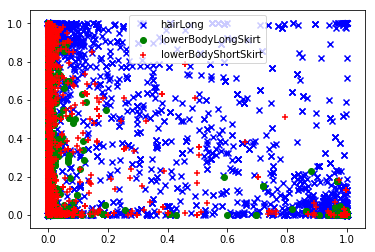

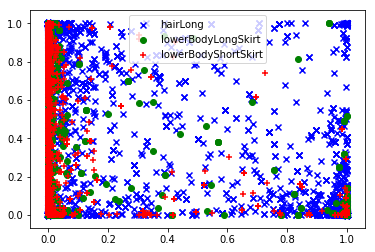

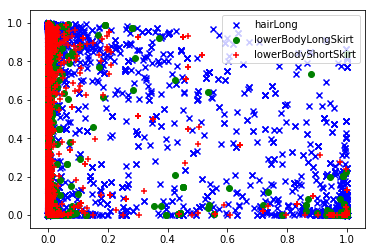

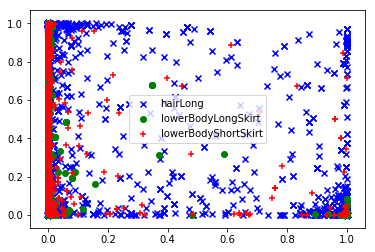

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

markers = ['x', 'o', '+', '.', 'v', '<', '>', '*']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
###GoogLeNet
predictions_prob = np.load("../results/predictions/GoogLeNet_binary61_predictions_imagenet_test7600.npy")
predictions = np.array(predictions_prob , dtype="float64")[:, sli_]#selected_#>= 0.5
#predictions[:, 3] = 1 - predictions[:, 3]
for i in range(predictions.shape[1]-1):
    plt.scatter(predictions[:, i], predictions[:, -1], marker = markers[i], color = colors[i], label=attributes_list[sli_[i]])
plt.legend()
plt.show()

###hiarGoogLeNet
predictions_prob = np.load("../results/predictions/hiarGoogLeNet_binary61_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob , dtype="float64")[:, sli]#selected#>= 0.5
#predictions[:, 3] = 1 - predictions[:, 3]
for i in range(predictions.shape[1]-1):
    plt.scatter(predictions[:, i], predictions[:, -1], marker = markers[i], color = colors[i], label=attributes_list_hiar[sli[i]])
plt.legend()
plt.show()

###hiarBayesGoogLeNet
predictions_prob = np.load("../results/predictions/hiarBayesGoogLeNet_binary61_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob, dtype="float64")[:, sli]#selected# >= 0.5
#predictions[:, 3] = 1 - predictions[:, 3]
for i in range(predictions.shape[1]-1):
    plt.scatter(predictions[:, i], predictions[:, -1], marker = markers[i], color = colors[i], label=attributes_list_hiar[sli[i]])
plt.legend()
plt.show()

###hiarBayesGoogLeNet_loss
predictions_prob = np.load("../results/predictions/hiarBayesGoogLeNet_binary61_multi_loss_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob, dtype="float64")[:, sli]#selected# >= 0.5
#predictions[:, 3] = 1 - predictions[:, 3]
for i in range(predictions.shape[1]-1):
    plt.scatter(predictions[:, i], predictions[:, -1], marker = markers[i], color = colors[i], label=attributes_list_hiar[sli[i]])
plt.legend()
plt.show()


# Bayes_p

In [89]:
###personalFemal
sli_ = [28, 29, 47, 34]#
sli = [20, 21, 35, 59]#
#for i in sli:
#    sli_.append(attributes_list.index(attributes_list_hiar[i]))
#lowerBodyCasual
#sli_ = [24, 29, 42, 45, 47, 14]
#sli = [17, 21, 30, 33, 35, 53]
#upperBodyCasual
#sli_ = [27, 56, 21, 23, 46, 58, 15]
#sli = [0, 3, 14, 16, 34, 44, 54]
#lowerBodyFormal
#sli_ = [50, 26, 57, 60, 18]
#sli = [2, 19, 43, 46, 56]
#upperBodyPlaid
#sli_ = [50, 56, 40]
#sli = [2, 3, 60]

In [96]:
gender = True
###GoogLeNet
predictions_prob = np.load("../results/predictions/GoogLeNet_binary61_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob , dtype="float64")[:, sli_]#selected_#>= 0.5
if gender: predictions[:, -1] = 1 - predictions[:, -1]
print("GoogLeNet-"+attributes_list[sli_[-1]])
for k in range(predictions.shape[1]-1):
    for i in range(5):
        res = 0
        count = 0
        print(attributes_list[sli_[k]]+'('+str(i)+')', end=":")
        for j in range(predictions.shape[0]):
            if predictions[j][k] >= i*0.2 and predictions[j][k] <= i*0.2+0.2:
                res += predictions[j][-1]
                count += 1
        print(res/count)

###hiarGoogLeNet
predictions_prob = np.load("../results/predictions/hiarGoogLeNet_binary61_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob , dtype="float64")[:, sli]#selected#>= 0.5
if gender: predictions[:, -1] = 1 - predictions[:, -1]
print("hiarGoogLeNet")
for k in range(predictions.shape[1]-1):
    for i in range(5):
        res = 0
        count = 0
        print(attributes_list_hiar[sli[k]]+'('+str(i)+')', end=":")
        for j in range(predictions.shape[0]):
            if predictions[j][k] >= i*0.2 and predictions[j][k] <= i*0.2+0.2:
                res += predictions[j][-1]
                count += 1
        print(res/count)


###hiarBayesGoogLeNet
predictions_prob = np.load("../results/predictions/hiarBayesGoogLeNet_binary61_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob, dtype="float64")[:, sli]#selected# >= 0.5
if gender: predictions[:, -1] = 1 - predictions[:, -1]
print("hiarBayesGoogLeNet")
for k in range(predictions.shape[1]-1):
    for i in range(5):
        res = 0
        count = 0
        print(attributes_list_hiar[sli[k]]+'('+str(i)+')', end=":")
        for j in range(predictions.shape[0]):
            if predictions[j][k] >= i*0.2 and predictions[j][k] <= i*0.2+0.2:
                res += predictions[j][-1]
                count += 1
        print(res/count)


###hiarBayesGoogLeNet_loss
predictions_prob = np.load("../results/predictions/hiarBayesGoogLeNet_binary61_multi_loss_predictions50_imagenet_test7600.npy")
predictions = np.array(predictions_prob, dtype="float64")[:, sli]#selected# >= 0.5
if gender: predictions[:, -1] = 1 - predictions[:, -1]
print("hiarBayesGoogLeNet_loss")
for k in range(predictions.shape[1]-1):
    for i in range(5):
        res = 0
        count = 0
        print(attributes_list_hiar[sli[k]]+'('+str(i)+')', end=":")
        for j in range(predictions.shape[0]):
            if predictions[j][k] >= i*0.2 and predictions[j][k] <= i*0.2+0.2:
                res += predictions[j][-1]
                count += 1
        if count != 0:
            print(res/count)
        else:
            print('-')

GoogLeNet-personalMale
hairLong(0):0.30438587258537053
hairLong(1):0.445862592077122
hairLong(2):0.5904741695345773
hairLong(3):0.7509047711196772
hairLong(4):0.9412458492529986
lowerBodyLongSkirt(0):0.43781395100769294
lowerBodyLongSkirt(1):0.8581131951825959
lowerBodyLongSkirt(2):0.8341607776958317
lowerBodyLongSkirt(3):0.8493928599734014
lowerBodyLongSkirt(4):0.9852490506784316
lowerBodyShortSkirt(0):0.42941275187984124
lowerBodyShortSkirt(1):0.7217890347036015
lowerBodyShortSkirt(2):0.8711310613489565
lowerBodyShortSkirt(3):0.7859881916542312
lowerBodyShortSkirt(4):0.9848034668645168
hiarGoogLeNet
hairLong(0):0.3538681893211738
hairLong(1):0.6064220034929751
hairLong(2):0.5821843687808003
hairLong(3):0.6763574731965906
hairLong(4):0.9173931700640846
lowerBodyLongSkirt(0):0.501002337163289
lowerBodyLongSkirt(1):0.5721043217927217
lowerBodyLongSkirt(2):0.7076821271942512
lowerBodyLongSkirt(3):0.8232275681220926
lowerBodyLongSkirt(4):0.9480419873408898
lowerBodyShortSkirt(0):0.4961528